# EDA

In [1]:
!pip install --upgrade pip
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for feature-engine from https://files.pythonhosted.org/packages/62/60/77fcc9d3cfaabab34027aa8ea0025c5e2d4cf9561fa9725a38f0785b43aa/feature_engine-1.6.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.4 MB/s eta 0:00:00


In [2]:
#Libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

#Libraries for feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import cat_boost

#Libraries for feature selection
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector as SFS

#Libraries for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, recall_score
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [3]:
#Import dataset
df = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
#Check shape
df.shape

(374, 13)

In [5]:
#Check missing value
print(df.isna().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [6]:
#check if the "None" type exists.
print(sum(df['Sleep Disorder'] == 'None'))

0


In [7]:
#Since the "None" is not included in the category, we can safely assume that the missing value in 'Sleep Disorder' category equals "None" type.
#Therefore, we will replace the missing value with 'None'. 
df.fillna('None',inplace = True)

In [8]:
#Since this dataset has 'Normal' and 'Normal Weight', we will unify these categories.
df['BMI Category'].replace('Normal Weight', 'Normal', inplace = True)

In [9]:
#Check descriptive statistic of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [10]:
#check each cols datatype
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [11]:
#We will drop 'Person ID' column, since we won't be using it.
df.drop('Person ID', inplace = True, axis = 1)

In [12]:
#Mean encoding buat feature occupation
#feature random

#Check each feature's unique value.
for x in df.columns:
    print(x)
    print(df[x].unique())

Gender
['Male' 'Female']
Age
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Occupation
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Sleep Duration
[6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep
[6 4 7 5 8 9]
Physical Activity Level
[42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level
[6 8 7 4 3 5]
BMI Category
['Overweight' 'Normal' 'Obese']
Blood Pressure
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Heart Rate
[77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps
[ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800 

# Visualization

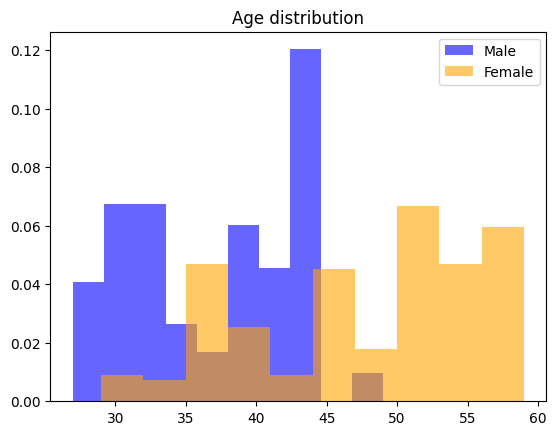

In [13]:
#Check the distibution of 'Age' column
df_ga = df.groupby(['Age','Gender']).size().reset_index(name='count')
df_ga
df_m = df[df['Gender'] == 'Male']
df_f = df[df['Gender'] == 'Female']

plt.hist(data = df_m, x = 'Age', color = 'Blue', alpha = 0.6, density = True, label = 'Male')
plt.hist(data = df_f, x ='Age', color = 'Orange', alpha = 0.6, density = True, label = 'Female')
plt.title('Age distribution')
plt.legend()
plt.show()

#### Age distribution of the subjects in our dataset.

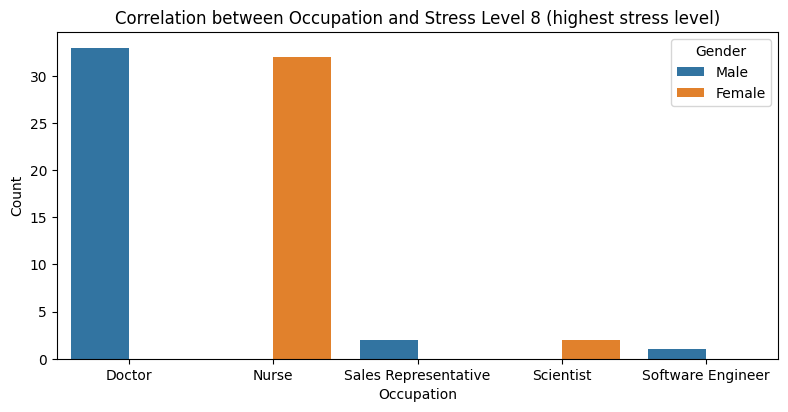

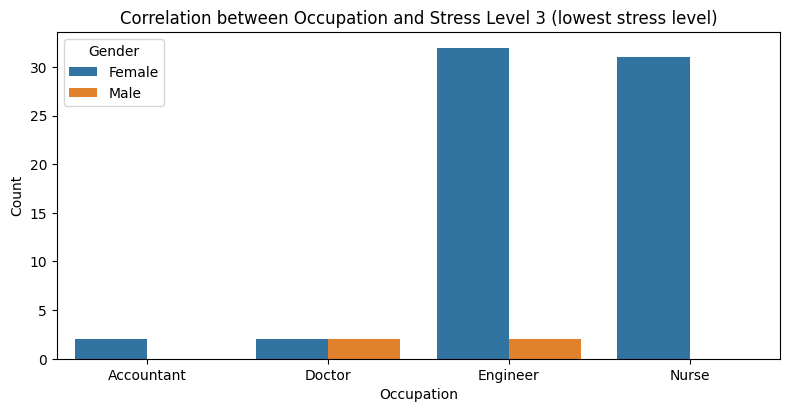

In [14]:
#Check the correlation between Occupation, Stress Level, and Gender in each Occupation
grouped_occ = df.groupby(['Occupation','Stress Level','Gender']).size().reset_index(name = 'Count')
grouped_occ = grouped_occ[grouped_occ['Stress Level'] == 8].reset_index()
grouped_occ.drop(grouped_occ[['index']], axis = 1, inplace = True)

plt.figure(figsize=(8,4))
sns.barplot(data = grouped_occ, x = 'Occupation', y = 'Count', hue = 'Gender')
plt.tight_layout()
plt.title('Correlation between Occupation and Stress Level 8 (highest stress level)')
plt.show()

grouped_occ2 = df.groupby(['Occupation','Stress Level','Gender']).size().reset_index(name = 'Count')
grouped_occ2 = grouped_occ2[grouped_occ2['Stress Level'] == 3].reset_index()
grouped_occ2.drop(grouped_occ2[['index']], axis = 1, inplace = True)

plt.figure(figsize=(8,4))
sns.barplot(data = grouped_occ2, x = 'Occupation', y = 'Count', hue = 'Gender')
plt.tight_layout()
plt.title('Correlation between Occupation and Stress Level 3 (lowest stress level)')
plt.show()

#### From this bar plot we can conclude that stress level 8 in occupations such as Doctor, Software Engineer, Sales Representative are dominated by males. Although the Nurse and Scientist occupation with stress level 8 are dominated by females. While in stress level 3, occupations such as Accountant, Engineer, and Nurse are dominated by males. while Doctors have a more balanced diversity between males and females.

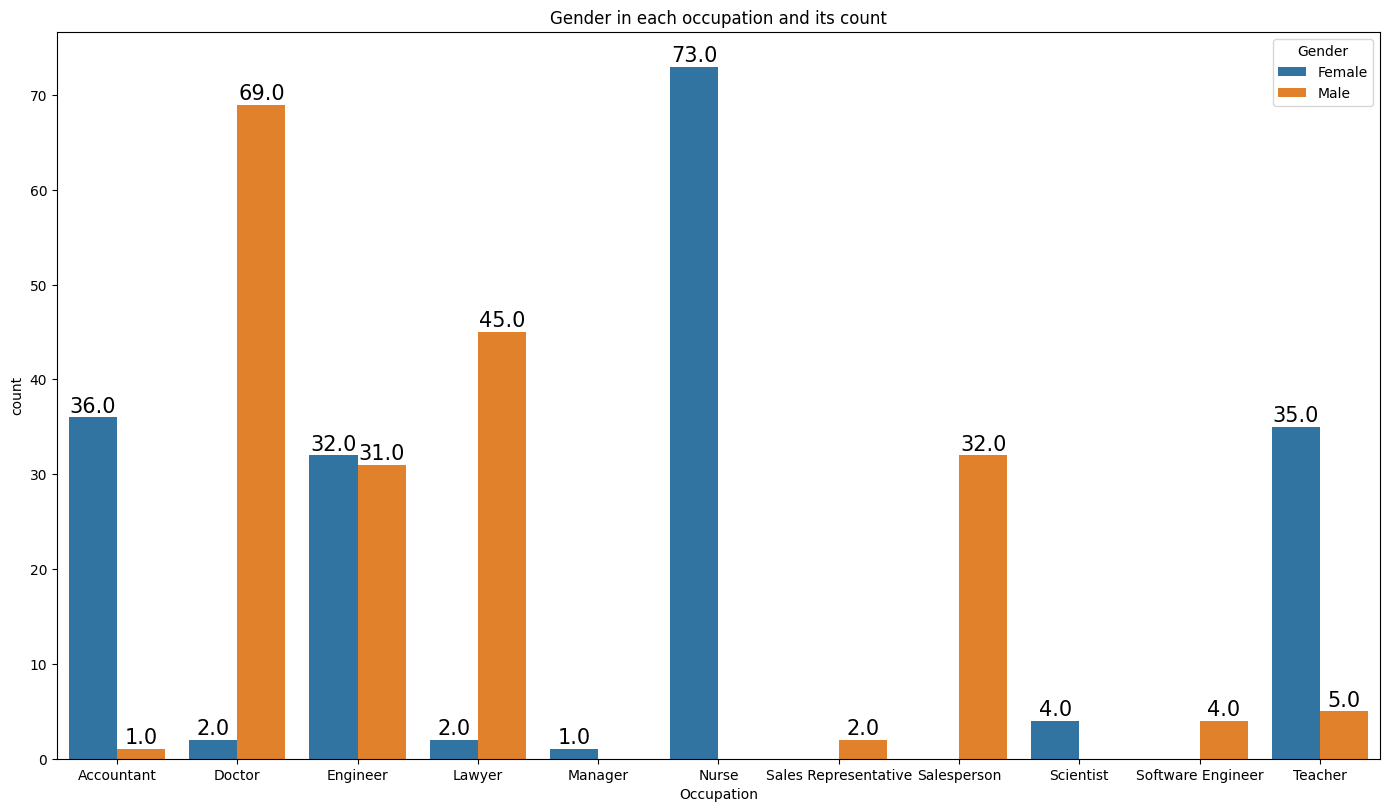

In [15]:
df_grouped = df.groupby(['Occupation', 'Gender']).size().reset_index(name='count')
plt.figure(figsize=(14,8))
plots = sns.barplot(data = df_grouped, x = 'Occupation', y = 'count', hue = 'Gender')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), ".1f"),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.tight_layout()
plt.title("Gender in each occupation and its count")
plt.show()

#### From this plot we can summarize that females dominate occupations such as accountant, nurse, manager, teacher, and scientist. On the other side, males dominate occupations such as doctor, lawyer, sales representative and person, and software engineer. Occupations such as Engineer are balancely diverse with both genders not having a significant gap from each other.

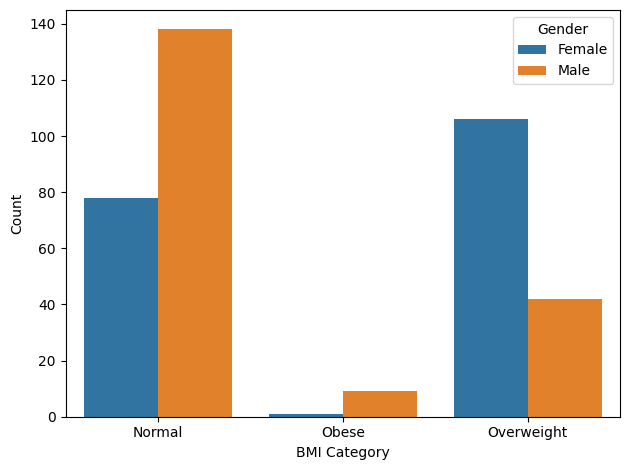

In [16]:
BMI_grouped = df.groupby(['BMI Category','Gender']).size().reset_index(name = "Count")
sns.barplot(data = BMI_grouped, x = 'BMI Category', y = 'Count', hue = 'Gender')
plt.tight_layout()
plt.show()

# Feature Engineering

In [17]:
#Encode nominal and ordinal category.

df_new = df

#Nominal category
enc = OneHotEncoder()
nominal_data = ['Gender']

for x in nominal_data:
    feature_arr = enc.fit_transform(df[[x]]).toarray()
    feature_labels = np.array(enc.categories_).ravel()
    features = pd.DataFrame(feature_arr, columns = feature_labels)
    df_new = pd.concat([df_new,features], axis = 1)
    
df_new.drop(['Occupation','Gender'],axis = 1, inplace = True)

#Ordinal categories
#Rank the various data in BMI Category.
BMI_cat = {'Obese' : 2,
          'Overweight' : 1,
          'Normal' : 0
          }
df_new['BMI Category'] = df_new['BMI Category'].map(BMI_cat)
df_new['BMI Category'].unique()

#Encode the target variable
label_enc = LabelEncoder()
df_new['Sleep Disorder'] = label_enc.fit_transform(df_new['Sleep Disorder'])

# insomnia = 0
# None = 1
# Sleep Apnea = 2
                
target = df_new[['Sleep Disorder']]
test_df = df.drop('Sleep Disorder', axis = 1)
#mean encoding
cboost = cat_boost.CatBoostEncoder()
cboost.fit(test_df, target)
res = cboost.transform(test_df)
df_new['Occupation'] = res['Occupation']
df_new

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female,Male,Occupation
0,27,6.1,6,42,6,1,126/83,77,4200,1,0.0,1.0,0.800535
1,28,6.2,6,60,8,0,125/80,75,10000,1,0.0,1.0,1.013926
2,28,6.2,6,60,8,0,125/80,75,10000,1,0.0,1.0,1.013926
3,28,5.9,4,30,8,2,140/90,85,3000,2,0.0,1.0,1.667558
4,28,5.9,4,30,8,2,140/90,85,3000,2,0.0,1.0,1.667558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,1,140/95,68,7000,2,1.0,0.0,1.783820
370,59,8.0,9,75,3,1,140/95,68,7000,2,1.0,0.0,1.783820
371,59,8.1,9,75,3,1,140/95,68,7000,2,1.0,0.0,1.783820
372,59,8.1,9,75,3,1,140/95,68,7000,2,1.0,0.0,1.783820


In [18]:
#Split the systolic and diastolic blood pressure, so we can use them in our model.
df_new[['Sys', 'Dias']] = df['Blood Pressure'].str.split('/', expand = True)
df_new.drop('Blood Pressure', axis = 1, inplace = True)
df_new['Sys'] = pd.to_numeric(df_new['Sys'])
df_new['Dias'] = pd.to_numeric(df_new['Dias'])

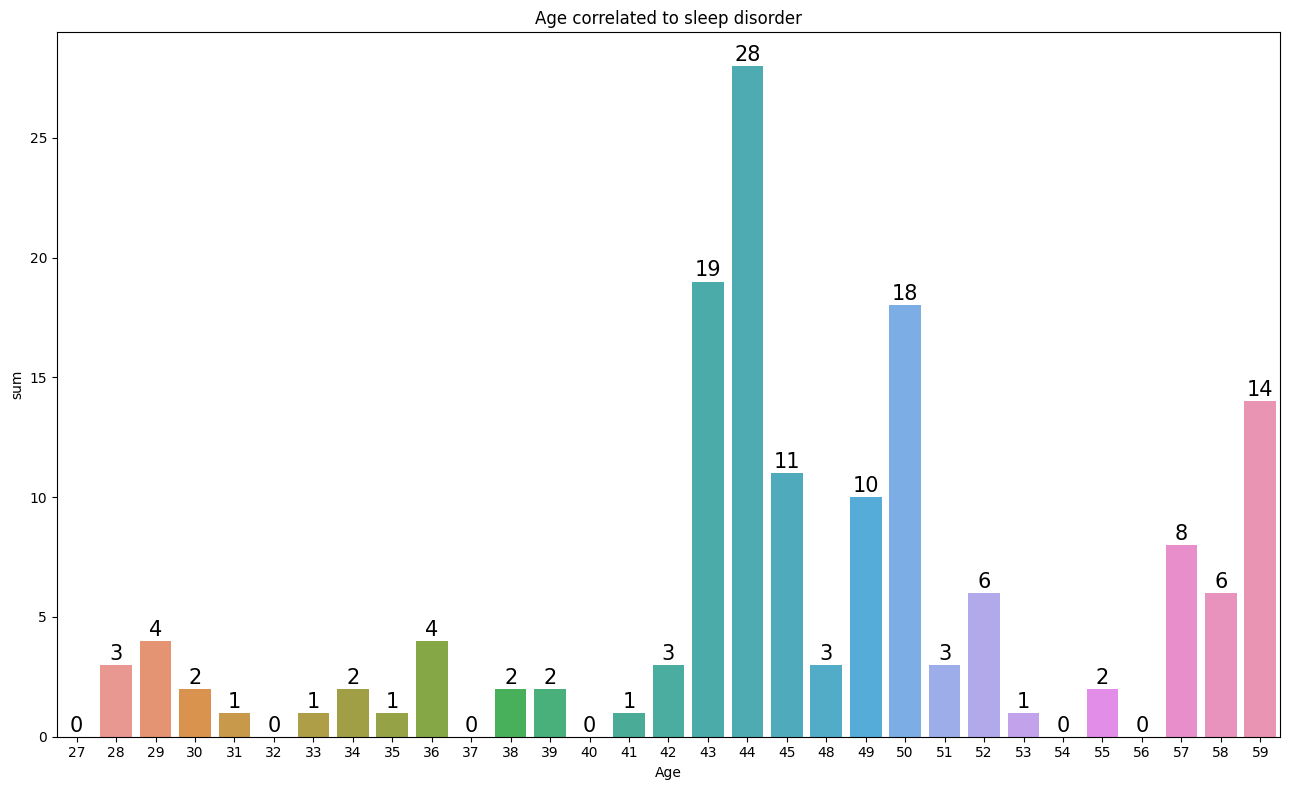

In [19]:
sd_aged_grouped = df_new.groupby(['Age','Sleep Disorder']).size().reset_index(name = 'Count')
pivot_df = sd_aged_grouped.pivot(index='Age', columns='Sleep Disorder', values='Count').reset_index()
pivot_df = pivot_df.fillna(0)
pivot_df.columns = ['Age','Insomnia','None','Sleep Apnea']
pivot_df['sum'] = pivot_df['Insomnia'] + pivot_df['Sleep Apnea']


plt.figure(figsize=(13,8))
plots = sns.barplot(data = pivot_df, y = 'sum', x = 'Age')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), ".0f"),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Age correlated to sleep disorder")
plt.tight_layout()
plt.show()

#### This plot shows that people from the age of 43-50 have a higher chance to suffer from sleep disorder. 

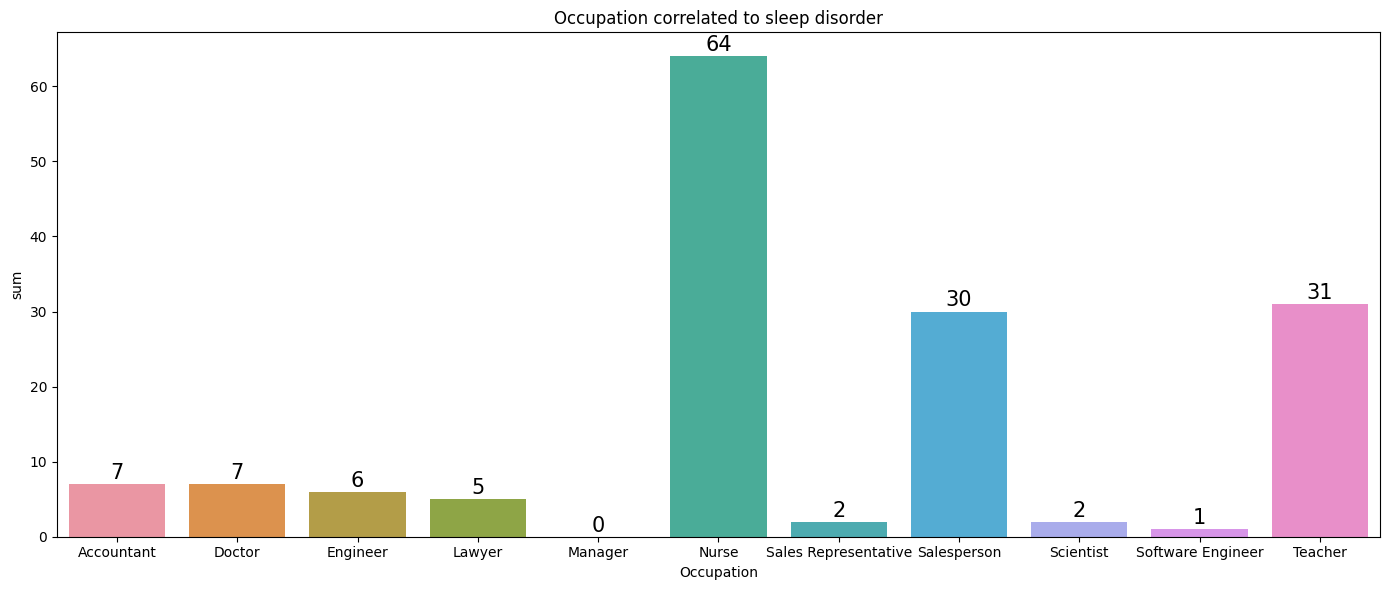

In [20]:
#Check correlation between Occupation and Sleep Disorder
df_occ = pd.DataFrame(df['Occupation'])
df_occ['Sleep Disorder'] = df_new['Sleep Disorder']

sd_occ_grouped = df_occ.groupby(['Occupation','Sleep Disorder']).size().reset_index(name = 'Count')
pivot_df = sd_occ_grouped.pivot(index='Occupation', columns='Sleep Disorder', values='Count').reset_index()
pivot_df = pivot_df.fillna(0)
pivot_df.columns = ['Occupation','Insomnia','None','Sleep Apnea']
pivot_df['sum'] = pivot_df['Insomnia'] + pivot_df['Sleep Apnea']

plt.figure(figsize=(14,6))
plots = sns.barplot(data = pivot_df, y = 'sum', x = 'Occupation')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), ".0f"),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Occupation correlated to sleep disorder")
plt.tight_layout()
plt.show()

#### This plot shows that nurses have the highest chance to suffer from sleep disorder, while sales person and teachers also have a higher chance compared to other occupations to have any form of sleep disorder.

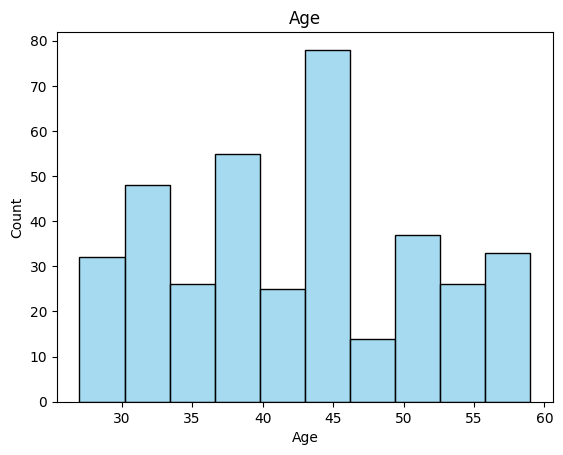

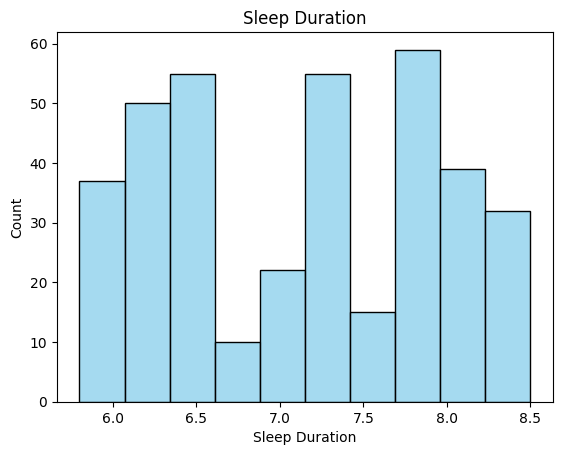

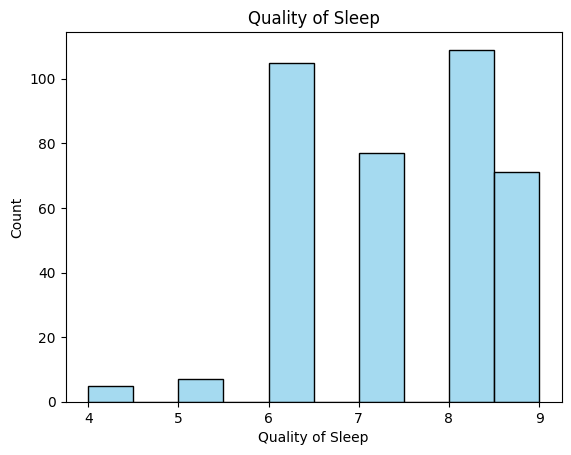

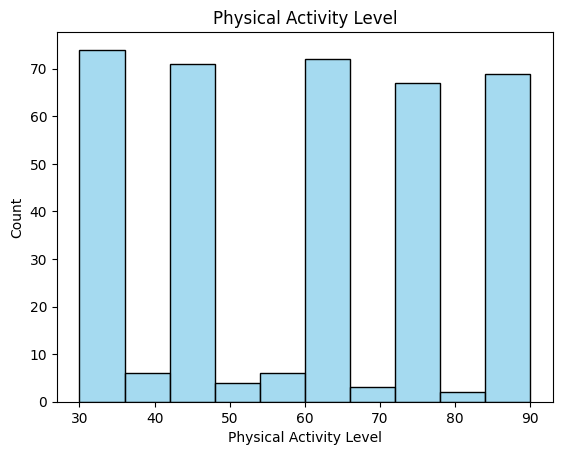

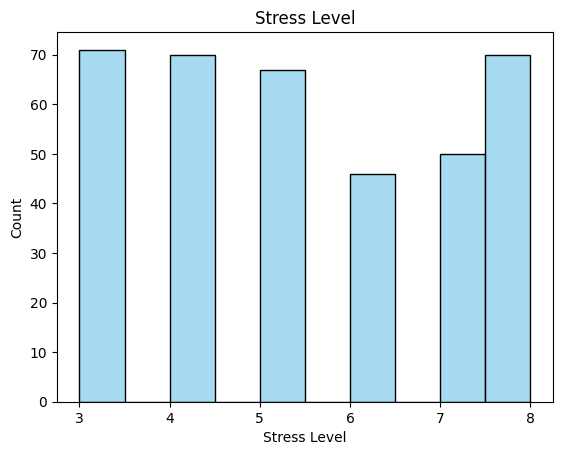

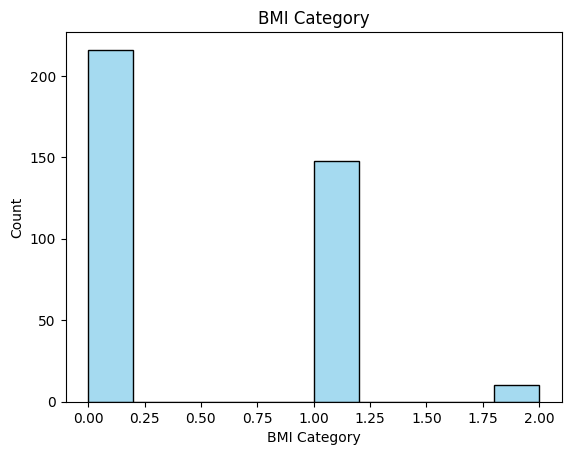

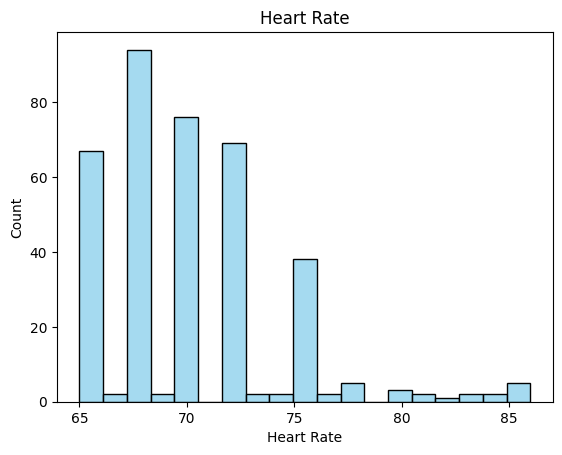

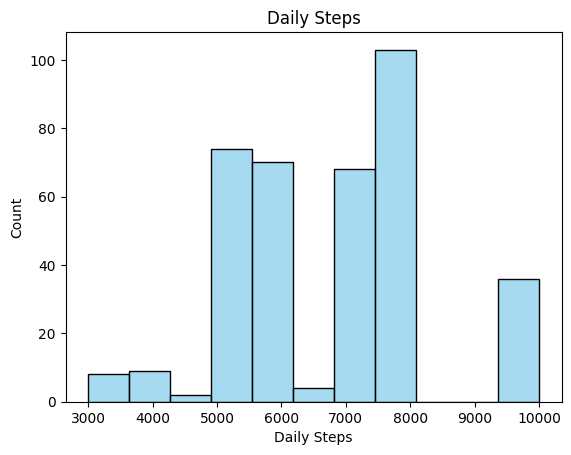

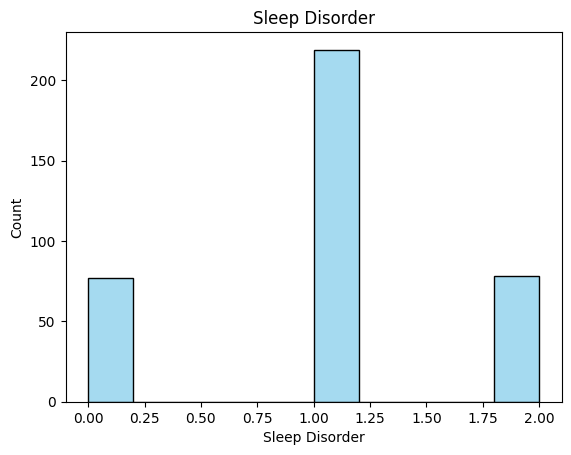

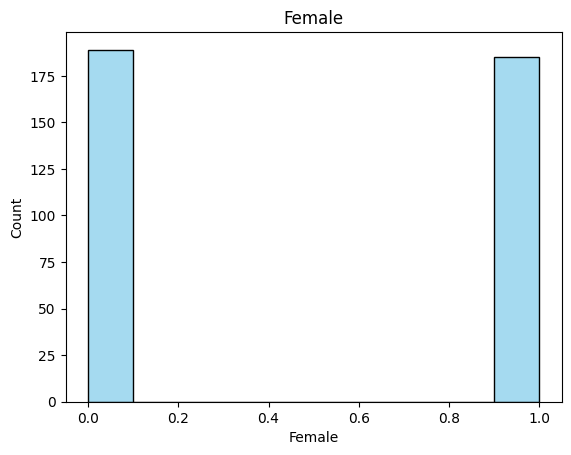

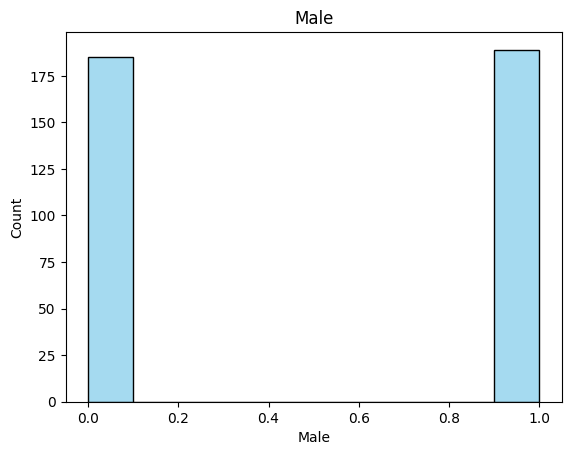

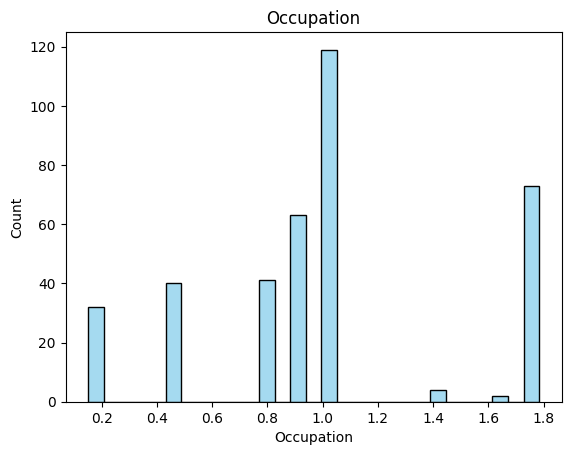

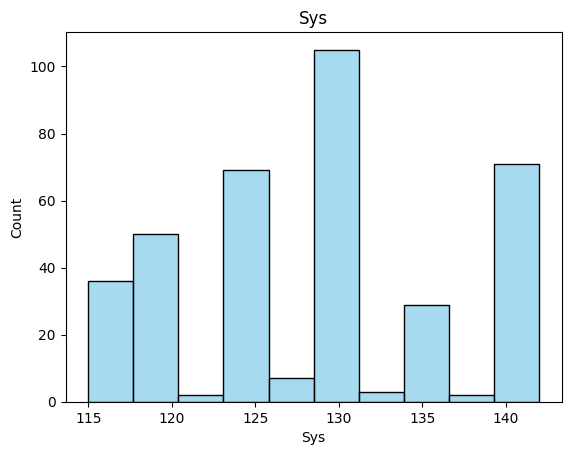

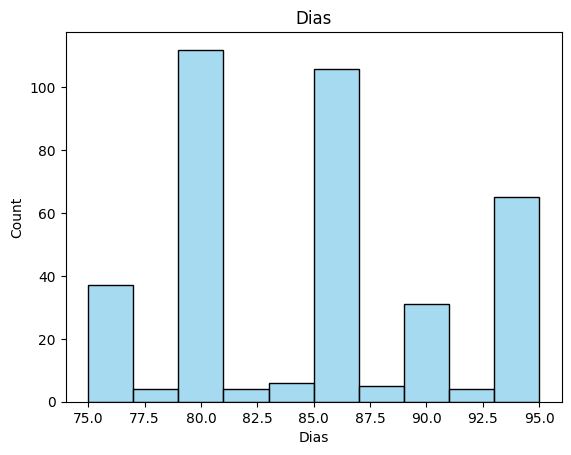

In [21]:
#Check each features' distribution.
for x in df_new.columns:
    sns.histplot(df_new[x], color='skyblue')
    plt.title(x)
    plt.show()

#### From the  plots above, we can conclude  that our dataset is not balanced.

# Cross Validation

In [22]:
dep = pd.DataFrame(df_new['Sleep Disorder'])
ind = df_new.drop(dep, axis = 1)

### Normal unscaled dataset

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
scaled_ind = scaler.fit_transform(ind)
#Shuffle split validation using XGBClassifier as the model.
XGBC = XGBClassifier()
CatC = CatBoostClassifier()
RandC = RandomForestClassifier() 

shuffle_val = ShuffleSplit(n_splits = 10, test_size = 0.30)

result_XGB = cross_val_score(XGBC, ind, dep, cv = shuffle_val)
result_CatC = cross_val_score(CatC, ind, dep, cv = shuffle_val)
result_RandC = cross_val_score(RandC, ind, dep, cv = shuffle_val)

print("XGBoost")
print(result_XGB)
print(np.mean(result_XGB))

print("CatBoost")
print(result_CatC)
print(np.mean(result_CatC))

print("Random Forest")
print(result_RandC)
print(np.mean(result_RandC))

Learning rate set to 0.073888
0:	learn: 1.0181705	total: 55.9ms	remaining: 55.9s
1:	learn: 0.9509673	total: 56.9ms	remaining: 28.4s
2:	learn: 0.8871486	total: 57.4ms	remaining: 19.1s
3:	learn: 0.8364188	total: 58.2ms	remaining: 14.5s
4:	learn: 0.7876867	total: 59ms	remaining: 11.7s
5:	learn: 0.7476734	total: 59.8ms	remaining: 9.91s
6:	learn: 0.7118423	total: 60.5ms	remaining: 8.59s
7:	learn: 0.6777148	total: 61.3ms	remaining: 7.6s
8:	learn: 0.6480387	total: 61.9ms	remaining: 6.82s
9:	learn: 0.6200771	total: 62.7ms	remaining: 6.21s
10:	learn: 0.5960800	total: 63.6ms	remaining: 5.72s
11:	learn: 0.5747699	total: 64.4ms	remaining: 5.3s
12:	learn: 0.5543083	total: 65ms	remaining: 4.94s
13:	learn: 0.5345430	total: 65.6ms	remaining: 4.62s
14:	learn: 0.5181554	total: 66.3ms	remaining: 4.35s
15:	learn: 0.5015065	total: 66.8ms	remaining: 4.11s
16:	learn: 0.4879614	total: 67.3ms	remaining: 3.89s
17:	learn: 0.4769660	total: 67.8ms	remaining: 3.7s
18:	learn: 0.4646442	total: 68.4ms	remaining: 3.53s

### Scaled dataset

In [24]:
result_XGB = cross_val_score(XGBC, scaled_ind, dep, cv = shuffle_val)
result_CatC = cross_val_score(CatC, scaled_ind, dep, cv = shuffle_val)
result_RandC = cross_val_score(RandC, scaled_ind, dep, cv = shuffle_val)

print("XGBoost")
print(result_XGB)
print(np.mean(result_XGB))

print("CatBoost")
print(result_CatC)
print(np.mean(result_CatC))

print("Random Forest")
print(result_RandC)
print(np.mean(result_RandC))

Learning rate set to 0.073888
0:	learn: 1.0209072	total: 1.11ms	remaining: 1.11s
1:	learn: 0.9540985	total: 1.91ms	remaining: 951ms
2:	learn: 0.8887045	total: 2.49ms	remaining: 827ms
3:	learn: 0.8400003	total: 3.38ms	remaining: 843ms
4:	learn: 0.7959467	total: 4.27ms	remaining: 850ms
5:	learn: 0.7555494	total: 5.15ms	remaining: 853ms
6:	learn: 0.7200054	total: 5.99ms	remaining: 849ms
7:	learn: 0.6869029	total: 6.92ms	remaining: 858ms
8:	learn: 0.6576178	total: 7.79ms	remaining: 857ms
9:	learn: 0.6310896	total: 8.72ms	remaining: 863ms
10:	learn: 0.6068921	total: 9.6ms	remaining: 863ms
11:	learn: 0.5870368	total: 10.4ms	remaining: 859ms
12:	learn: 0.5683871	total: 11.3ms	remaining: 857ms
13:	learn: 0.5518661	total: 12ms	remaining: 848ms
14:	learn: 0.5360135	total: 12.7ms	remaining: 837ms
15:	learn: 0.5212890	total: 13.5ms	remaining: 830ms
16:	learn: 0.5078417	total: 14.2ms	remaining: 821ms
17:	learn: 0.4953468	total: 14.9ms	remaining: 815ms
18:	learn: 0.4833303	total: 15.7ms	remaining: 8

#### Scaled XGBoost performs better than the other model. Therefore, we will be using both of it.

# 

# Feature Selection

In [25]:
X_train, X_test,  y_train, y_test = train_test_split(ind, dep, test_size = 0.25, random_state = 1, stratify =  dep)

### Filtering quasi-constant features

In [26]:
quasi = VarianceThreshold(threshold = 0.02)
quasi.fit(X_train)
print("quasi-constant features in dataset : ",sum(~quasi.get_support()))

quasi-constant features in dataset :  0


In [27]:
quasi_constant = X_train.columns[~quasi.get_support()]
quasi_constant

Index([], dtype='object')

#### Since all the quasi-constant features were derived from nominal data. we won't remove these features.

### Filtering constant and duplicated features

In [28]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol = 0.998)),
    ('duplicated',DropDuplicateFeatures(variables = None))
])

pipe.fit(X_train)
print("Constant features count : ",len(pipe.named_steps['constant'].features_to_drop_))
print("Duplciated features count :",len(pipe.named_steps['duplicated'].duplicated_feature_sets_))

Constant features count :  0
Duplciated features count : 0


In [29]:
#Divide each columns to it's category
dependent = pd.DataFrame(y_train['Sleep Disorder'])

ordinal = pd.DataFrame(X_train[['BMI Category', 'Stress Level', 'Quality of Sleep']])

nominal = pd.DataFrame(X_train['Female'])
nominal['Male'] = X_train['Male']
nominal['Occupation'] = df_new['Occupation']

continuous = pd.DataFrame(X_train[['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']])
continuous['Sys'] = X_train['Sys']
continuous['Dias'] = X_train['Dias']

### Filtering by correlation for continuous data

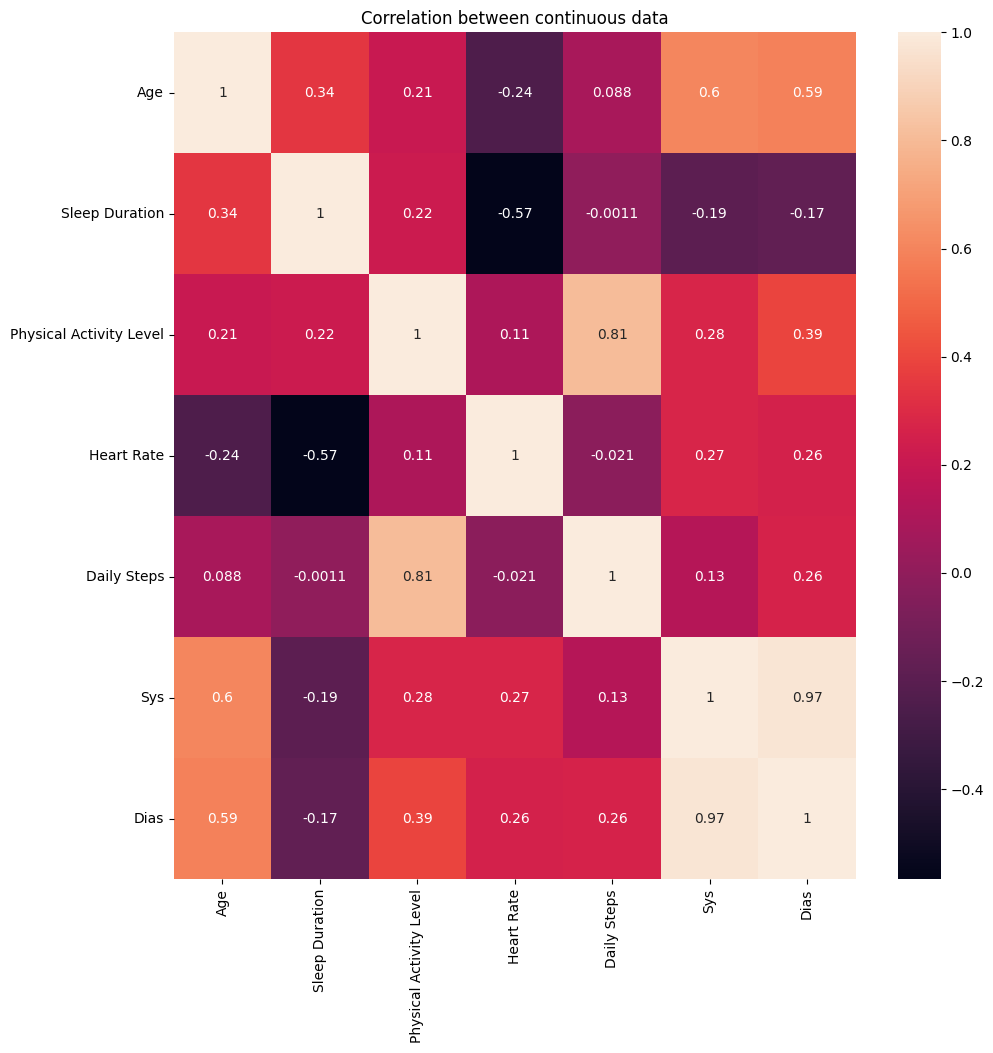

In [30]:
corr_mat = continuous.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_mat, annot= True)
plt.title("Correlation between continuous data")
plt.show()

### Filtering by correlation for continuous data

<Figure size 300x300 with 0 Axes>

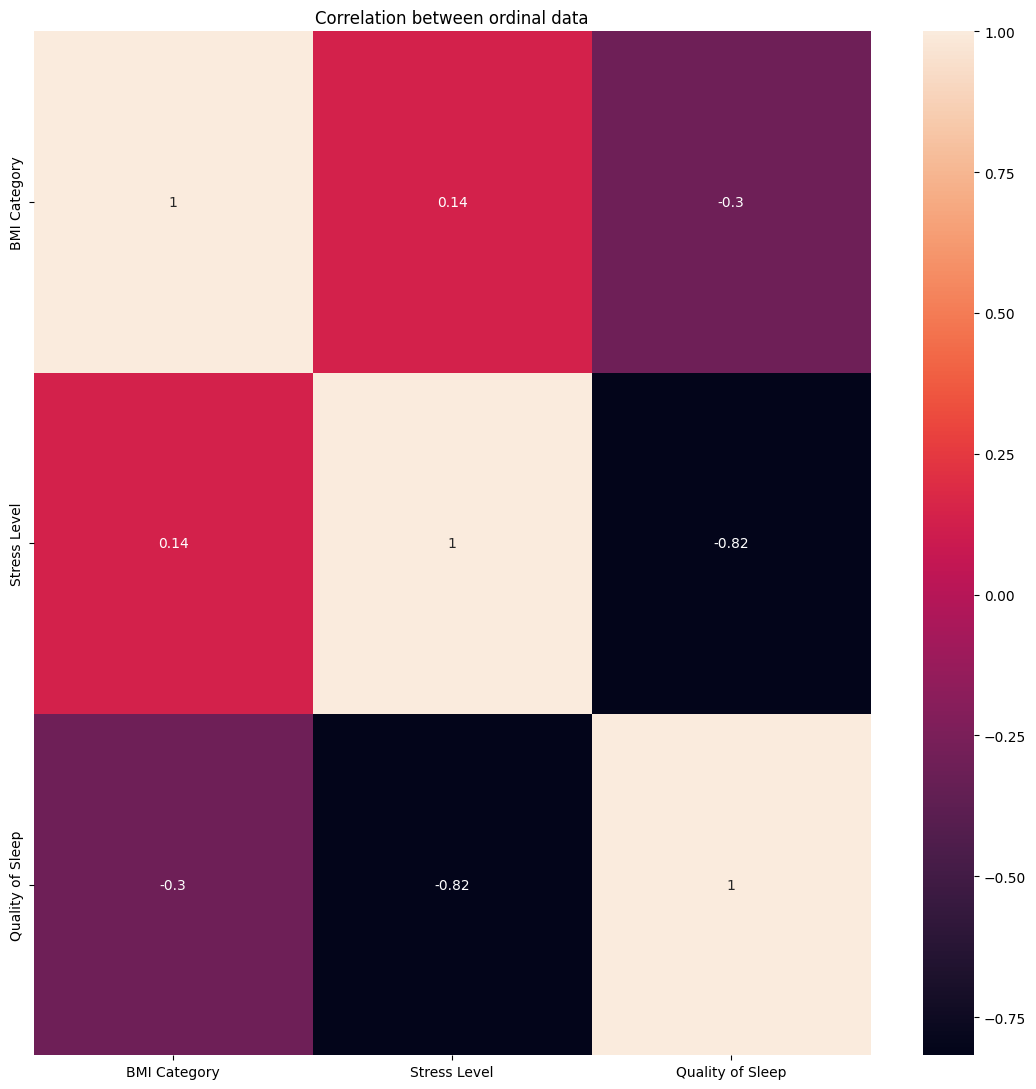

In [31]:
corr_mat = ordinal.corr(method = "kendall")
plt.figure(figsize=(3,3))
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_mat, annot= True)
plt.title("Correlation between ordinal data")
plt.tight_layout()
plt.show()

### Univariate model performance 

In [32]:
roc_val = []
for f in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[f].to_frame(),y_train)
    y_s = clf.predict_proba(X_test[f].to_frame())
    roc_val.append(roc_auc_score(y_test, y_s, multi_class = 'ovr'))


In [33]:
roc_val = pd.Series(roc_val)
roc_val.index = X_train.columns
roc_val = roc_val.sort_values(ascending = False)
print(roc_val)
features = roc_val.index[0:12]

Sleep Duration             0.951419
Age                        0.925811
Occupation                 0.922856
Sys                        0.919775
Dias                       0.908436
Daily Steps                0.887495
BMI Category               0.872707
Stress Level               0.860992
Physical Activity Level    0.831544
Heart Rate                 0.820350
Quality of Sleep           0.787991
Female                     0.633822
Male                       0.633822
dtype: float64


#### Since all of our features have 50%+ of accuracy, we will use all of our features. 

### Scaled dataset model

In [34]:
X_train_feat = pd.DataFrame(X_train[features])
X_test_feat = pd.DataFrame(X_test[features])

X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled = scaler.fit_transform(X_test_feat)

multi_roc = make_scorer(roc_auc_score,average = 'weighted', multi_class = 'ovr',needs_proba= True)

model = XGBClassifier()
model2 = DecisionTreeClassifier()

model.fit(X_train_scaled, y_train)

model2.fit(X_train_scaled, y_train)

print("ROC_AUC with XGB Classifier : ", multi_roc(X = X_test_scaled, y_true = y_test, estimator = model))

pred = model.predict(X_test_scaled)
print("Accuracy of XGB Classifier : ",accuracy_score(y_test,pred))

print("score with XGB Classifier : ", model.score(X_test_scaled, y_test))


ROC_AUC with XGB Classifier :  0.946675808377936
Accuracy of XGB Classifier :  0.9361702127659575
score with XGB Classifier :  0.9361702127659575


### Randomized Search Hyperparameter Tuning

In [35]:
#Hyper parameter optimization
rand_params = {
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth' : [3,4,5,6,8,10,13,16],
    'min_child_weight' : [1,3,5,7],
    'subsample': [0.6, 0.8, 1.0],
    'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.8],
    'n_estimators' : [8,12,26,34,46,58,67,77,]
}

In [36]:
random_search = RandomizedSearchCV(model, param_distributions = rand_params, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)

In [37]:
random_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/con

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.8],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 13,
                                                      16],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [8, 12, 26, 34, 46, 58,
                                                         67, 77],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=3)

In [38]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=46, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [39]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 46,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [40]:
rand_opt_model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=8, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None)

### Model Evaluation

In [41]:
rand_opt_model.fit(X_train_scaled, y_train)
print("ROC_AUC Score of randomized search optimized XGB Classifier : ", multi_roc(X = X_test_scaled, y_true = y_test, estimator = rand_opt_model))
print("Model score : ", rand_opt_model.score(X_test_scaled,y_test))
pred = rand_opt_model.predict(X_test_scaled)
print("Accuracy Score : ", accuracy_score(y_test, pred))

ROC_AUC Score of randomized search optimized XGB Classifier :  0.9691428908450185
Model score :  0.9361702127659575
Accuracy Score :  0.9361702127659575


#### Randomized Search Tuning increased our model's performance

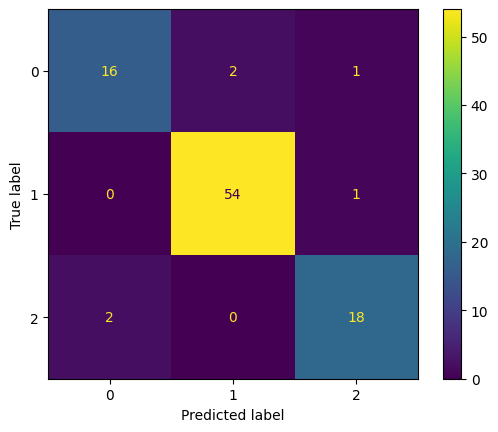

In [42]:
#Confusion Matrix 
conf_mat = confusion_matrix(y_test, pred)
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat)
conf_mat_display.plot()
plt.show()

In [43]:
print("F1 score : ", f1_score(y_test, pred, average = 'weighted'))
print("Precision score : ", precision_score(y_test, pred, average= 'weighted'))
print("Recall score : ", recall_score(y_test, pred, average= 'weighted'))

F1 score :  0.9355951696377229
Precision score :  0.9353681188787573
Recall score :  0.9361702127659575


#### High Precision and Recall score indicates that our model accurately makes correct prediction between 3 classes